# Loading Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Loding Data

In [5]:
data = pd.read_csv("bank_note_data.csv")

In [6]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
features = list(data.columns)[:-1]
target = list(data.columns)[-1]

# Scaling Data

In [12]:
from sklearn.preprocessing import StandardScaler

data_norm = data.copy()
sc = StandardScaler()
data_norm[features] = sc.fit_transform(data[features])

In [13]:
data_norm

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


# TSNE

In [16]:
from sklearn.manifold import TSNE 
tsne = TSNE(learning_rate=  500, n_components= 2)
x_tsne = tsne.fit_transform(data_norm[features])

In [17]:
x_tsne

array([[ 29.352968,  25.323107],
       [ 27.305567,  28.889923],
       [-33.242916,  31.171259],
       ...,
       [-61.593426, -11.931956],
       [-53.403687, -15.342062],
       [-18.626192, -34.47021 ]], dtype=float32)

In [18]:
y = data[target]

In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

# Visualisation

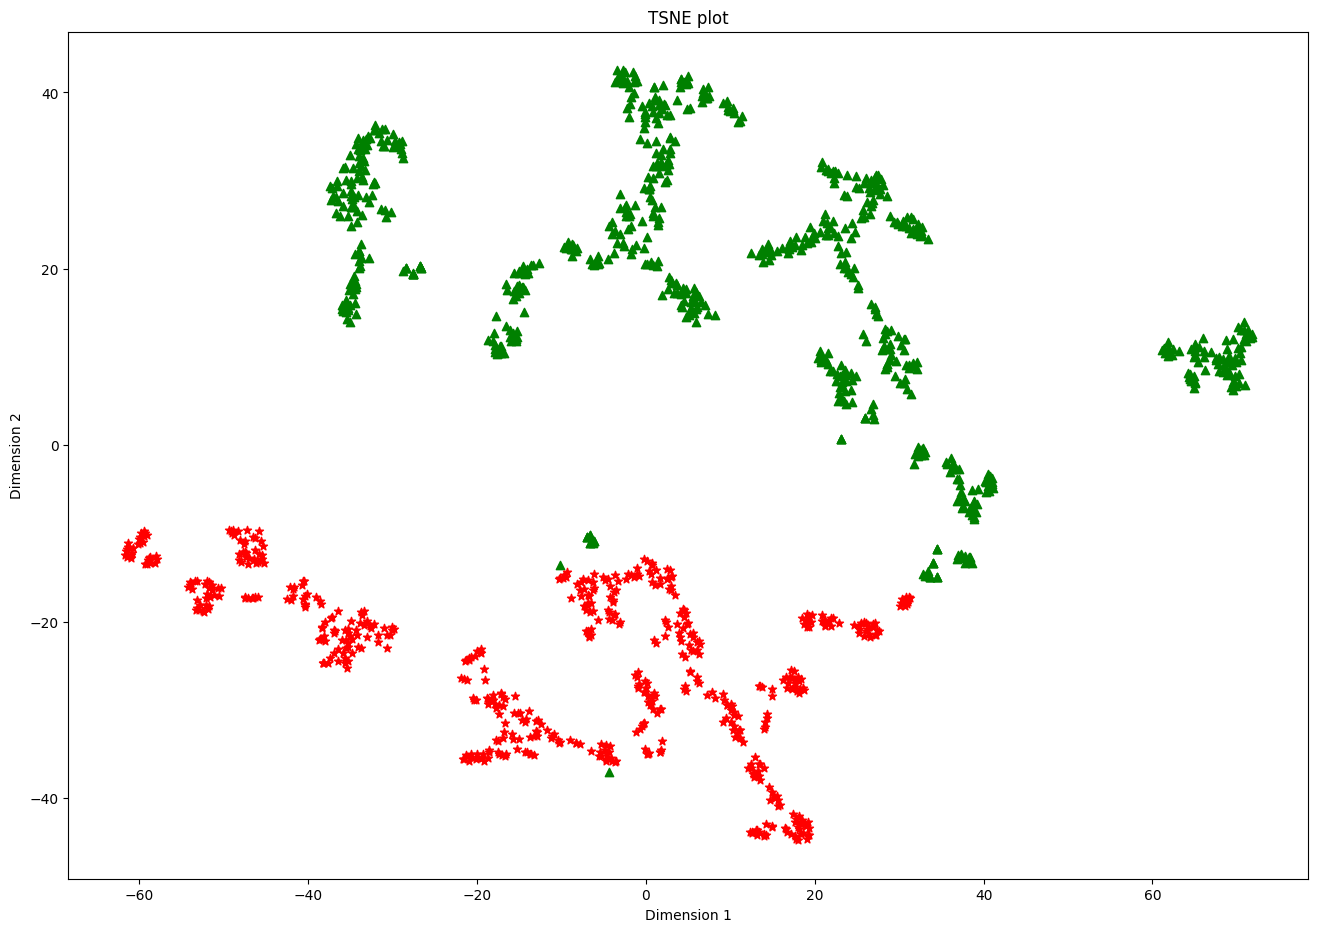

In [21]:
plt.figure(figsize= (16,11))
plt.scatter(x_tsne[np.where(y==0),0], x_tsne [np.where(y==0), 1], color = 'g', marker = "^")
plt.scatter(x_tsne[np.where(y==1),0], x_tsne [np.where(y==1), 1], color = 'r', marker = "*")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("TSNE plot")
plt.show()

In [22]:
x_tsne[np.where(y==0)]

array([[ 29.352968 ,  25.323107 ],
       [ 27.305567 ,  28.889923 ],
       [-33.242916 ,  31.171259 ],
       ...,
       [ 36.237103 ,  -2.6989772],
       [ -1.8452176,  38.66048  ],
       [  0.7221804,  27.758535 ]], dtype=float32)

In [25]:
x_tsne[np.where(y==1)]

array([[  8.174275, -28.58142 ],
       [ -4.815574, -15.302255],
       [-40.365997, -17.049505],
       ...,
       [-61.593426, -11.931956],
       [-53.403687, -15.342062],
       [-18.626192, -34.47021 ]], dtype=float32)